In [1]:
import numpy as np
from utils_predictions_manipulation import*
from utils_nans_manipulation import*
from cross_validation import*
from utils_data_loading import*
from utils_features_manipulation import*
import random

### Loading data

In [98]:
traindata,_ = load_data('Data/train.csv')

X_total, Y_total = structure_data(traindata)

X_total = replace_bad_data_with_nans(X_total, -999)

X_total.shape

(250000, 31)

In [82]:
thresh = [[23, 0.5],
          [23, 1.5],
          [23, 2.5],
          [12, 0],
          [13, 0.5]]

X_sets, Y_sets, thresholds = split_data_set(X_total, Y_total, thresh)

In [100]:
dtmp_tr,dtmp_te = cross_validation(Y_total, X_total, k_fold=4, seed=1, function_name='least_squares')
print(dtmp_tr, dtmp_te, sum(Y_total)/Y_total.shape[0] +dtmp_tr)
print(sum(Y_total))

0.657332 0.657332 1.0
85667


In [101]:
X_total, col = replace_nans_with_median(X_total, threshold=0.5)

In [102]:
dtmp_tr,dtmp_te = cross_validation(Y_total, X_total, k_fold=4, seed=1, function_name='least_squares')
print(dtmp_tr, dtmp_te, sum(Y_total)/Y_total.shape[0] +dtmp_tr)
print(sum(Y_total))

0.7338880000000001 0.7339239999999999 1.076556
85667


In [90]:
points_x = []
points_y = []
for i in range(len(X_sets)):
    X_set = X_sets[i]
    Y_set = Y_sets[i]
    
    acc = 0
    acc2 = 0
    print(thresholds[i])
    for j in range(len(X_set)):
        X_split = X_set[j]
        Y_split = Y_set[j]
        
        dtmp_tr,dtmp_te = cross_validation(Y_split, X_split, k_fold=4, seed=1, function_name='least_squares')
        
        acc = acc + dtmp_tr*(X_split.shape[0]/X_total.shape[0])
        
        if dtmp_tr>0.3:
            acc2 = acc2 + dtmp_tr*(X_split.shape[0]/X_total.shape[0])
        else:
            select = max([sum(Y_split/Y_split.shape[0]), 1-sum(Y_split/Y_split.shape[0])])
            acc2 = acc2 + select*(Y_split.shape[0]/Y_total.shape[0])
            
        print(X_split.shape[0], "\t", dtmp_tr, dtmp_te, "\t", sum(Y_split/Y_split.shape[0])+dtmp_tr)
        points_x.append(sum(Y_split/Y_split.shape[0]))
        points_y.append(dtmp_tr)
    print("TOTAL:", acc)
    print("ARTIF:", acc2, "\n")

([23, 0.5],)
150087 	 0.5990711868020575 0.5990711868020575 	 1.0000053116766023
99913 	 0.744865481623829 0.7448654816238289 	 1.000007455140746
TOTAL: 0.6573381683161681
ARTIF: 0.6573381683161681 

([23, 1.5],)
72543 	 0.5524813895781638 0.5524813895781637 	 1.000009062820415
177457 	 0.700201740149671 0.700201740149671 	 1.0000039457546355
TOTAL: 0.6573374305836356
ARTIF: 0.6573374305836356 

([23, 2.5],)
22164 	 0.6963093304457679 0.696309330445768 	 0.9999999999999586
227836 	 0.6535402658052284 0.6535402658052283 	 0.9999999999996747
TOTAL: 0.6573320000000001
ARTIF: 0.6573320000000001 

([12, 0],)
115094 	 0.5155353977687416 0.5155353977687415 	 1.0000002699601387
134906 	 0.7783016070687304 0.7783016070687303 	 0.999996713290939
TOTAL: 0.6573303506960388
ARTIF: 0.6573303506960388 

([13, 0.5],)
34908 	 0.40050991176807615 0.40050991176807604 	 0.9999999999999614
37635 	 0.6934523809523809 0.6934523809523809 	 1.0000287061815583
177457 	 0.700201740149671 0.700201740149671 	 1.00

10796 	 0.8484623934790663 0.8484623934790664 	 0.9999999999999967
60743 	 0.5440401712216002 0.5440401712216003 	 1.0000104064751572
116714 	 0.7814791966550141 0.7814791966550141 	 1.000004823400806
TOTAL: 0.6573363529792142
ARTIF: 0.6573363529792142 

([23, 2.5], [12, 0], [13, 0.5])
6637 	 0.5592224231464737 0.5592224231464737 	 0.9999335878293036
10087 	 0.7000198333994447 0.7000198333994446 	 1.0000099196490582
1959 	 0.7903885480572597 0.7903885480572598 	 1.0001894668933986
3481 	 0.8939655172413794 0.8939655172413793 	 0.9999695390741868
20875 	 0.27017056343426604 0.270170563434266 	 0.9999909227159554
16752 	 0.589541547277937 0.5895415472779371 	 1.0000000000000477
60743 	 0.5440401712216002 0.5440401712216003 	 1.0000104064751572
5437 	 0.5667770419426048 0.5667770419426048 	 1.0001042444440076
7315 	 0.8269967177242888 0.826996717724289 	 1.0002024593510848
116714 	 0.7814791966550141 0.7814791966550141 	 1.000004823400806
TOTAL: 0.6573439110835086
ARTIF: 0.695724669036768

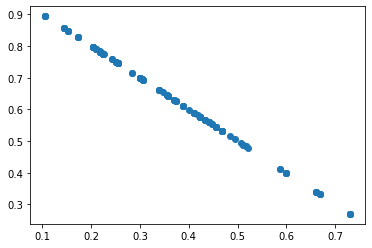

In [89]:
import matplotlib.pyplot as plt
plt.scatter(points_x, points_y)

0.7754636200208518